# Generating and Comparing Different Datasets 

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model  import LassoCV, LogisticRegression
#PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

## Make Two Feature Datasets For Visualization:

Changing class separation changes the difficulty of the classification task. The data points no longer remain easily separable in case of lower class separation.

The sklearn make_classification API helps us create datasets with different distributions. We are focusing on class_sep hyperparameter to evaluate the performances of Lasso models. 

Let's first have a look at how make_classification API works.

Below are two datasets with class seperations of 0.2 and 2. Both datasets have two clusters per class. They both have 2 features for us to be able to visualize the data. 




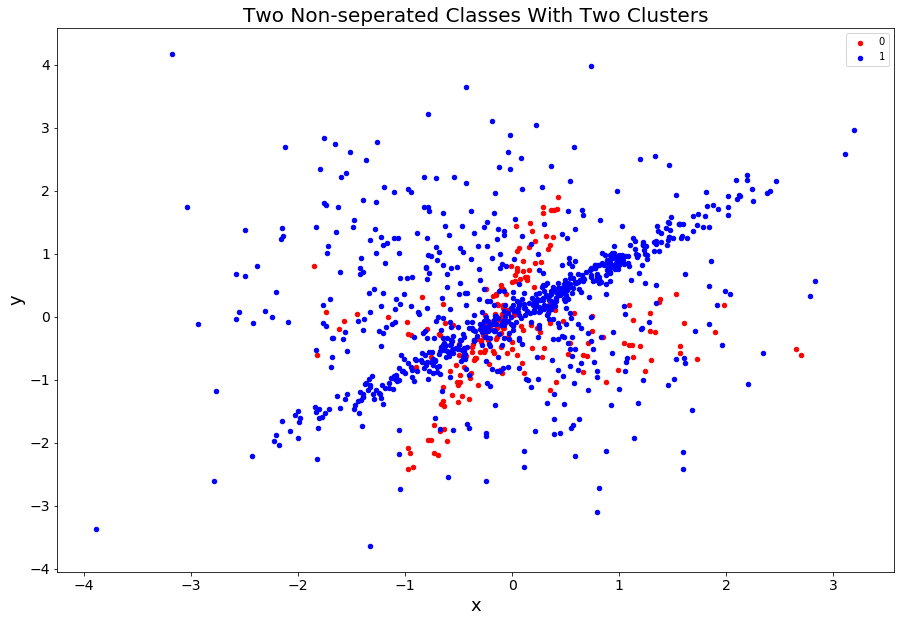

In [17]:
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, 
                          n_classes=2, n_clusters_per_class=2,class_sep=0.2,flip_y=0,weights=[0.2,0.8],
                          random_state=42, shuffle=False)

df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))


plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
fig, ax = plt.subplots(figsize=(15,10))
grouped = df.groupby('label')
colors = {0: 'red', 1: 'blue'}
for key, group in grouped:
    group.plot(ax=ax,kind='scatter', x ='x', y='y', label=key, color=colors[key]);
plt.title('Two Non-seperated Classes With Two Clusters', fontdict={'fontsize': 20})
plt.show()

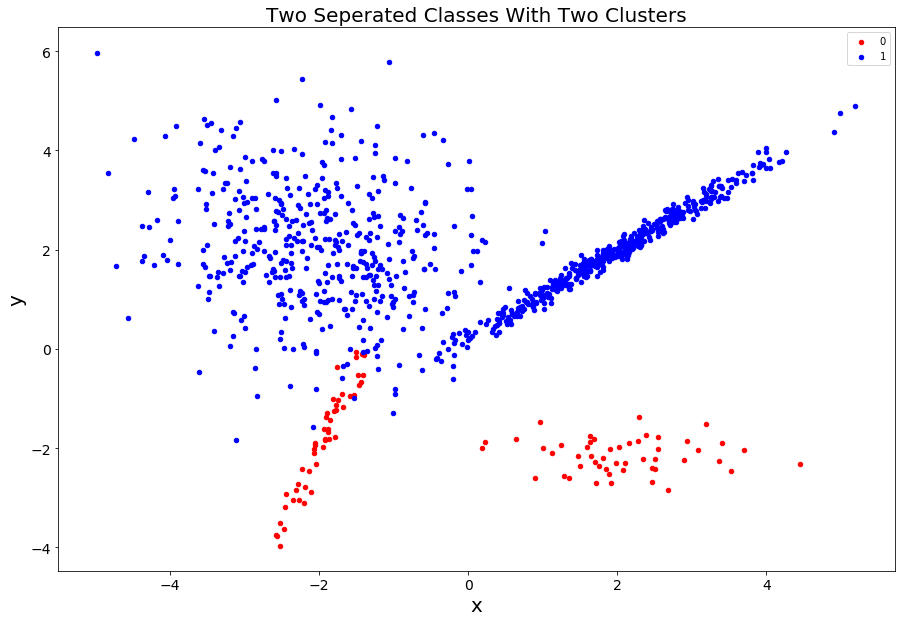

In [16]:
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, 
                          n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.1,0.9],
                          random_state=42, shuffle=False)

df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))


plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
fig, ax = plt.subplots(figsize=(15,10))
grouped = df.groupby('label')
colors = {0: 'red', 1: 'blue'}
for key, group in grouped:
    group.plot(ax=ax,kind='scatter', x ='x', y='y', label=key, color=colors[key])
plt.title('Two Seperated Classes With Two Clusters', fontdict={'fontsize': 20})
plt.show()

## Make 10 Datasets Of Different Class Seperations

Below are 10 datasets that made using a for loop. 

<b>For each dataset;</b>

Class seperations: 0.25, 0.5 , 0.75, 1.0  , 1.25, 1.5 , 1.75, 2.0  , 2.25, 2.5 

Number of samples: 10000 (big enough sample size)

Number of features: 20 (I chose 20 features, we will reduce the dimensionality to 2 by PCA)

Number of informative features: 5 (There are 5 important features in the datasets.)

Number of classes: 4 (I chose 4 classes to see the performance of the PCA much better.)

Number of clusters per class:1 (We have 4 classes, more than 1 cluster makes the data too complicated. )


<b> Note: </b> This simulation gives better results if the class seperation is np.linspace(0.25, 5, 10)



 Class seperation for this dataset:  0.25


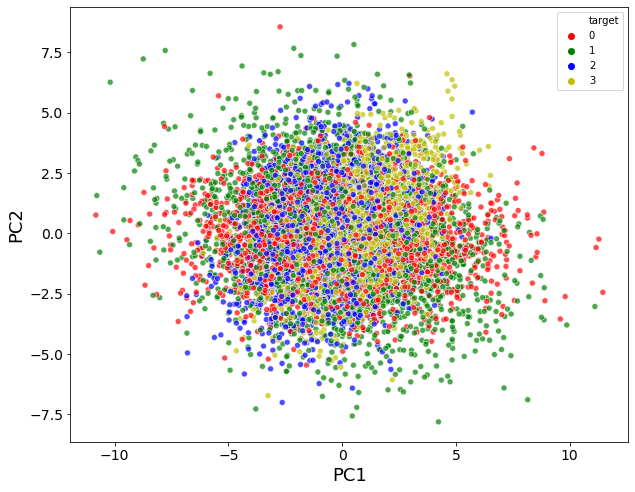

Variance of each component: [0.24315515 0.13888063]

 Total Variance Explained: 38.2
--------------------------------------------------------------------------------

 Class seperation for this dataset:  0.5


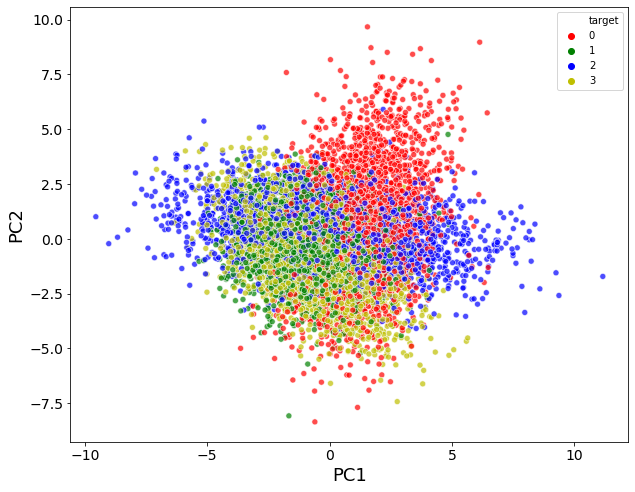

Variance of each component: [0.18557843 0.15103282]

 Total Variance Explained: 33.66
--------------------------------------------------------------------------------

 Class seperation for this dataset:  0.75


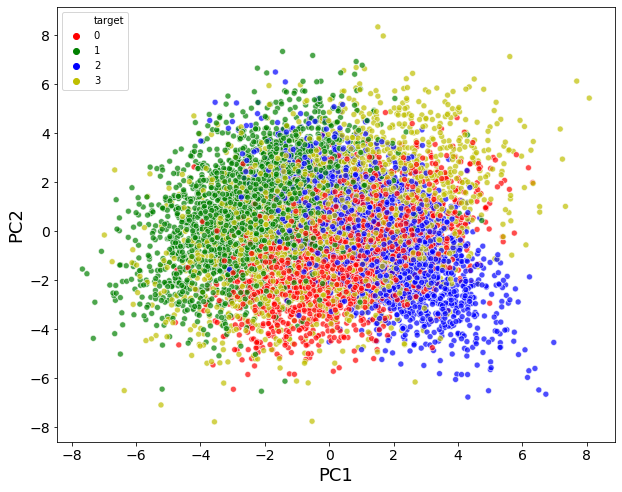

Variance of each component: [0.19000428 0.15433563]

 Total Variance Explained: 34.43
--------------------------------------------------------------------------------

 Class seperation for this dataset:  1.0


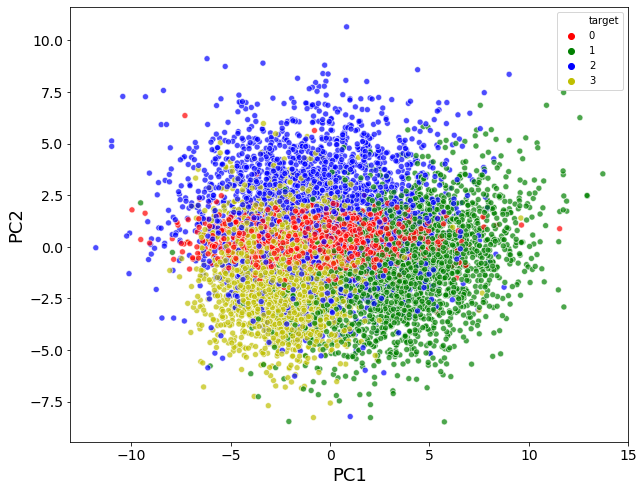

Variance of each component: [0.34495982 0.14768866]

 Total Variance Explained: 49.26
--------------------------------------------------------------------------------

 Class seperation for this dataset:  1.25


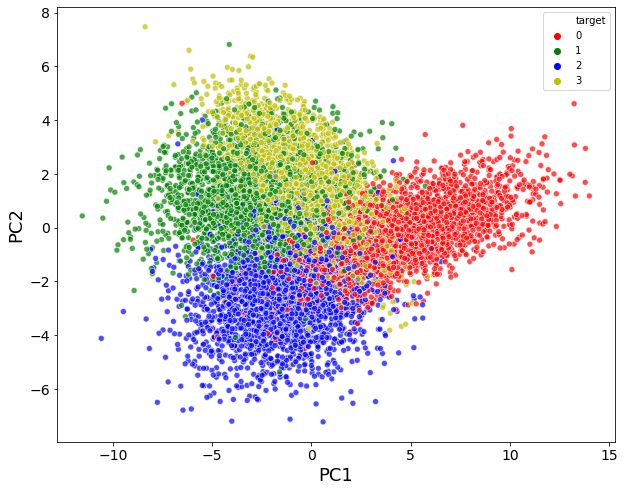

Variance of each component: [0.37645894 0.12491443]

 Total Variance Explained: 50.14
--------------------------------------------------------------------------------

 Class seperation for this dataset:  1.5


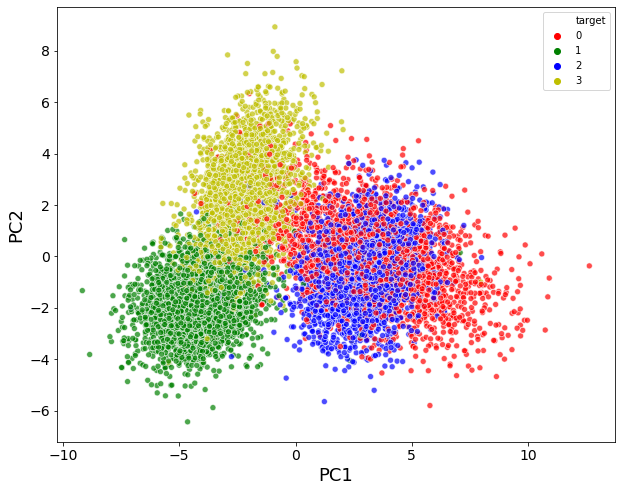

Variance of each component: [0.34823238 0.12073515]

 Total Variance Explained: 46.9
--------------------------------------------------------------------------------

 Class seperation for this dataset:  1.75


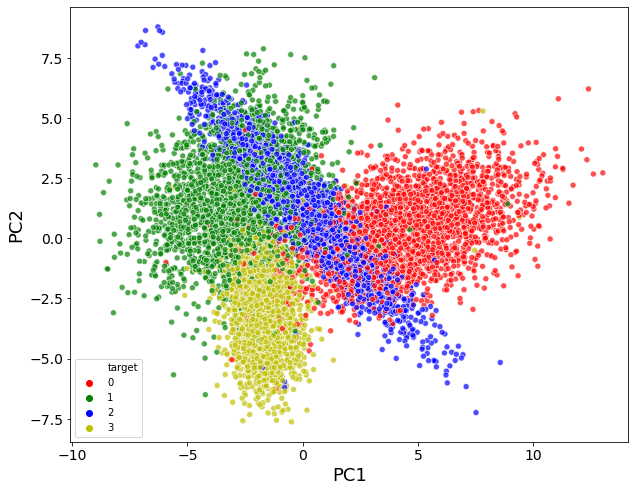

Variance of each component: [0.30282067 0.18444195]

 Total Variance Explained: 48.73
--------------------------------------------------------------------------------

 Class seperation for this dataset:  2.0


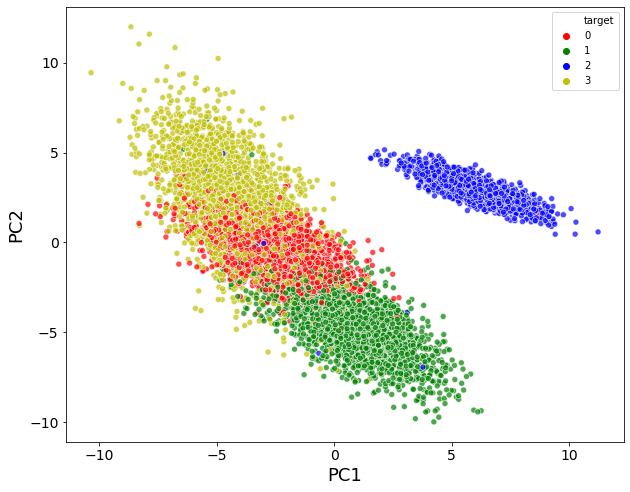

Variance of each component: [0.34981097 0.22889212]

 Total Variance Explained: 57.87
--------------------------------------------------------------------------------

 Class seperation for this dataset:  2.25


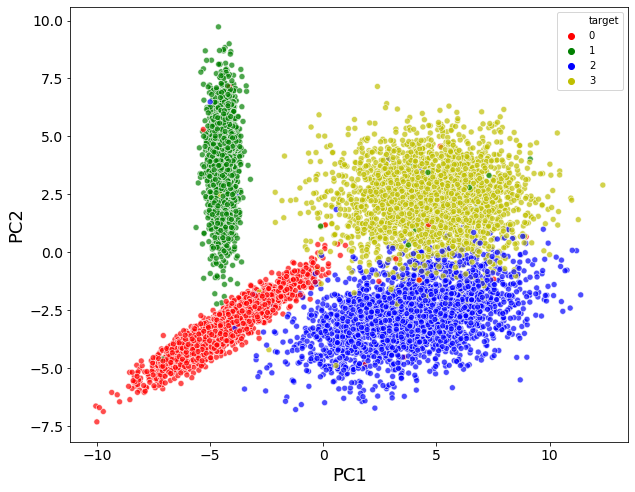

Variance of each component: [0.39032995 0.19360642]

 Total Variance Explained: 58.39
--------------------------------------------------------------------------------

 Class seperation for this dataset:  2.5


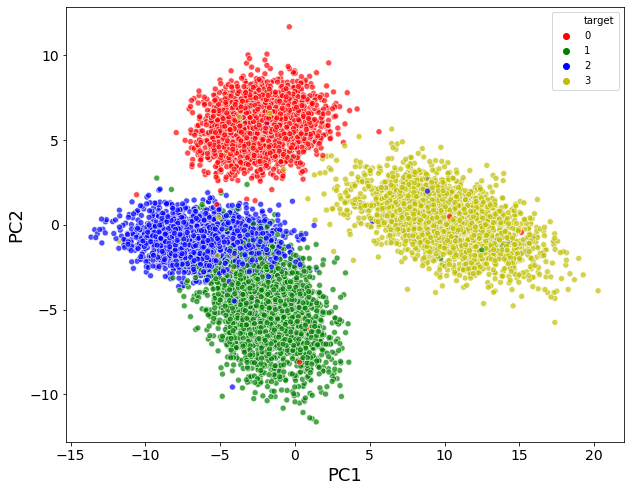

Variance of each component: [0.50875895 0.20322634]

 Total Variance Explained: 71.2
--------------------------------------------------------------------------------


In [23]:
total_variance_list = []
for class_sep in np.linspace(0.25, 2.5, 10): #np.linspace(0.25, 5, 10) gives better visualizations
    
    print('\n Class seperation for this dataset: ', round(class_sep, 2))
    
    # Generate 10 datasets with different class seperations
    X,y = make_classification(class_sep=class_sep, n_samples=10000, n_features=20, 
                              n_informative=5,n_classes=4, n_clusters_per_class=1)
    # reduce dimensions by PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
   
    #Make a dataframe using the new components
    df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
    # Add the target column to the dataframe
    df['target'] = y
    
    #plot the new components of the dataset
    fig= plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df['PC1'],y=df['PC2'],hue=df['target'], palette= ['r', 'g','b','y'], alpha=0.7)
    plt.show()
    
    #print the explained variance
    total_variance_explained=round(np.sum(pca.explained_variance_ratio_)*100, 2)
    total_variance_list.append(total_variance_explained)
    print('Variance of each component:', pca.explained_variance_ratio_)
    print('\n Total Variance Explained:',  total_variance_explained)
    print(40*'--')

### Plot The Total Explained Variance After PCA

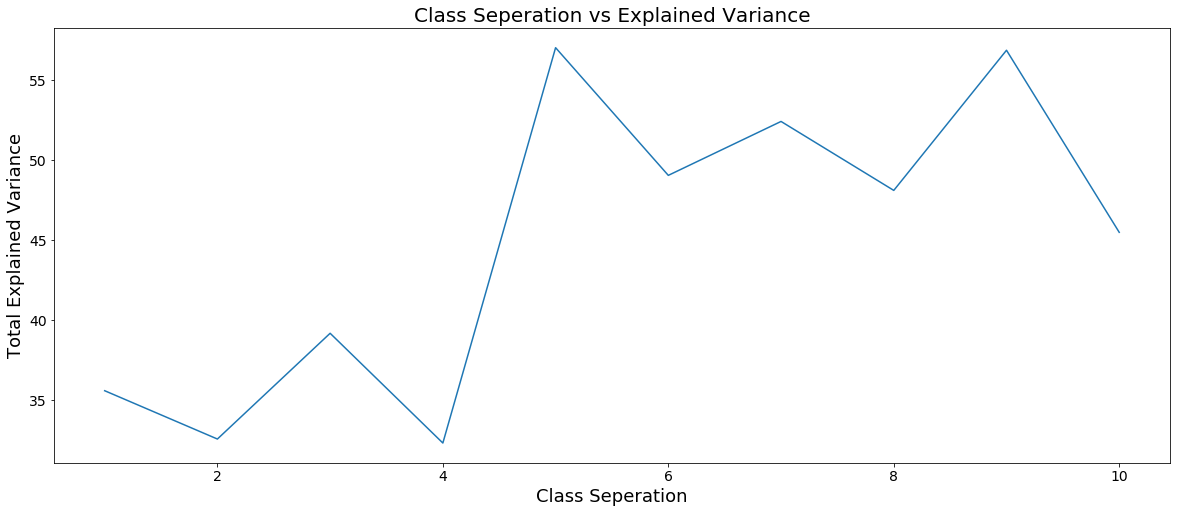

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(x=range(1,11,1) ,y=total_variance_list)
plt.title("Class Seperation vs Explained Variance",fontdict={'fontsize': 20} )
plt.xlabel('Class Seperation')
plt.ylabel('Total Explained Variance')
plt.show()

## Compare Class Seperations With Lasso Models

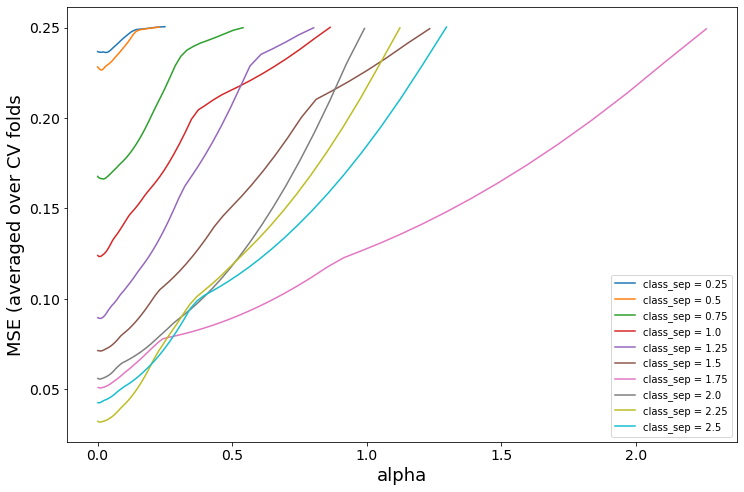

In [86]:
plt.figure(figsize=(12,8))

#creating 10 classes with different class_sep
for cs in np.linspace(0.25, 2.5, 10): 
    X,y = make_classification(class_sep=cs, n_samples=1000, n_informative=10)
    model_fit = LassoCV(cv=10, max_iter=5000).fit(X, y)
    
    #uncomment these cells to print the values
    
#     print(f'\n--------------------  class_sep = {cs}  --------------------')
    
#     print(f'alphas_ {model_fit.alphas_[0:10]} \n') 
 
#     print(f'optimal alpha_ {model_fit.alpha_} ')
    
#     print(f'mse_path_ {np.min(np.mean(model_fit.mse_path_, axis=1))} ')
    
   
    #plotting the alphas vs mse_path
    plt.plot(model_fit.alphas_, np.mean(model_fit.mse_path_, axis=1), label=f'class_sep = {cs}')
    
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE (averaged over CV folds')
plt.show()

## Logistic Regression

I would like to run a logistic regression,which is the same as LassoCV. We could use the probabilities of LassoCV for classification, as well.

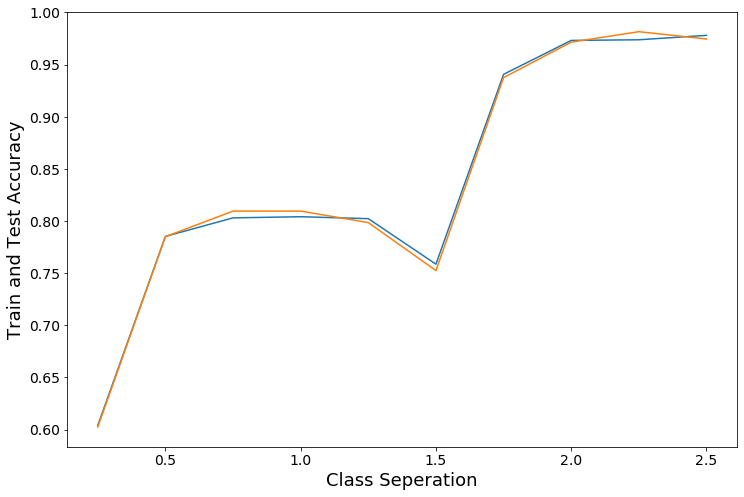

In [94]:
plt.figure(figsize=(12,8))
test_accuracy_list= []
train_accuracy_list= []
for cs in np.linspace(0.25, 2.5, 10): 
    
    X,y = make_classification(class_sep=cs, n_samples=10000, n_informative=10)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    log = LogisticRegression(solver='liblinear', penalty='l1', max_iter=5000)
    log.fit(scaled_X_train, y_train)
    y_pred_train = log.predict(scaled_X_train)
    y_pred_test = log.predict(scaled_X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)
    
line1 = sns.lineplot(x=np.linspace(0.25, 2.5, 10), y=train_accuracy_list)
line2 = sns.lineplot(x=np.linspace(0.25, 2.5, 10), y=test_accuracy_list)
plt.xlabel('Class Seperation')
plt.ylabel('Train and Test Accuracy')
plt.show()


## Conclusion

As we can see from the above plots, the performance of our algorithm depends on the data. If the data is hard to seperate, most algorithms will fail. 

Class seperation and accuracy are directly proportional to each other. Accuracy increases when classes are easy to seperate.